# Data wrangling WeRateDogs Project

##### By Mahmoud Adel Taya

In [127]:
import pandas as pd 
import numpy as np
import tweepy
import glob
import requests
import os
import seaborn as sb
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import json 
import PIL.Image
from io import BytesIO
from PIL import Image

## 1-Gathering Data

1-**Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

2- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

### 1-Twitter archive file


In [2]:
#read csv file after download manually
archive_df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### 2-Tweet image prediction


In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
#Read TSV file
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t' )

In [6]:
image_prediction.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

### 3-Twitter API & JSON

In [7]:
# Tweepy keys and token

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

#### this code for bring tweets from json file but becasues it need privte secure key i uploaded tweet_json file instead of that
# #collect Tweepy status object based on Tweet ID and store in list
list_of_tweets = []

# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []

with open('tweet_json.txt', 'w') as file:
    for tweet_id in list(archive_df['tweet_id']):
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            list_of_tweets.append(tweet_id)
        except Exception as e:
            cant_find_tweets_for_those_ids.append(tweet_id)
    

In [8]:
# load tweets stautus json file after gathering 
tweet_status = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

## =======================================================

## 2-Assessing data

In [9]:
# Reading gathered files
tw_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
tweet_status_df = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

### *Visual assessment*

In [10]:
tw_archive_df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [11]:
image_predictions_df

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [12]:
tweet_status_df

created_at                  id              id_str  \
0    2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1    2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2    2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3    2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4    2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   
...                        ...                 ...                 ...   
2349 2015-11-16 00:24:50+00:00  666049248165822465  666049248165822464   
2350 2015-11-16 00:04:52+00:00  666044226329800704  666044226329800704   
2351 2015-11-15 23:21:54+00:00  666033412701032449  666033412701032448   
2352 2015-11-15 23:05:30+00:00  666029285002620928  666029285002620928   
2353 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
0     This is Phineas. He's a mystical boy. Only eve...      False   
1     This is Tilly. She's just checking pup on you....      False   
2     This is Archie. He is a rare Norwegian Pouncin...      False   
3     This is Darla. She commenced a snooze mid meal...      False   
4     This is Franklin. He would like you to stop ca...      False   
...                                                 ...        ...   
2349  Here we have a 1949 1st generation vulpix. Enj...      False   
2350  This is a purebred Piers Morgan. Loves to Netf...      False   
2351  Here is a very happy pup. Big fan of well-main...      False   
2352  This is a western brown Mitsubishi terrier. Up...      False   
2353  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
0               [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1              [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2              [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3               [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4              [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   
...                 ...                                                ...   
2349           [0, 120]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2350           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2351           [0, 130]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2352           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2353           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
0     {'media': [{'id': 892420639486877696, 'id_str'...   
1     {'media': [{'id': 892177413194625024, 'id_str'...   
2     {'media': [{'id': 891815175371796480, 'id_str'...   
3     {'media': [{'id': 891689552724799489, 'id_str'...   
4     {'media': [{'id': 891327551943041024, 'id_str'...   
...                                                 ...   
2349  {'media': [{'id': 666049244999131136, 'id_str'...   
2350  {'media': [{'id': 666044217047650304, 'id_str'...   
2351  {'media': [{'id': 666033409081393153, 'id_str'...   
2352  {'media': [{'id': 666029276303482880, 'id_str'...   
2353  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r..

### *Programmatic assessment*


**1-twitter-archive**

In [13]:
##check datatype and columns number and names
tw_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# initial statistics of data
tw_archive_df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [15]:
# shape of data colums and rows
tw_archive_df.shape

(2356, 17)

In [16]:
#check duplicate data for tweet_id 
tw_archive_df.tweet_id.duplicated().sum()

0

In [17]:
# check standard rate denominator sholud be 10
tw_archive_df[tw_archive_df['rating_denominator'] >10 ]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   

                      timestamp  \
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   

                                                 source  \
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
342            @docmisterio account started on 11/15/15                  NaN   
433   The floofs have been released I repeat the flo...                  NaN   
784   RT @dog_rates: After so many requests, this is...         7.403732e+17   
902   Why does this never happen at my front door......                  NaN   
1068  After so many requests, this is Bretagne. She ...                  NaN   
1120  Say hello to this unbelievably well behav

In [18]:
# mistyping for rate  numerator
tw_archive_df[tw_archive_df['rating_numerator'] >20 ]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
290   838150277551247360           8.381455e+17         2.195506e+07   
313   835246439529840640           8.352460e+17         2.625958e+07   
340   832215909146226688                    NaN                  NaN   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
979   749981277374128128                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1712  680494726643068929                    NaN                  NaN   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2074  670842764863651840                    NaN                  NaN   

                      timestamp  \
188   2017-04-22 19:15:32 +0000   
189   2017-04-22 19:05:32 +0000   
290   2017-03-04 22:12:52 +0000   
313   2017-02-24 21:54:03 +0000   
340   2017-02-16 13:11:49 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
695   2016-10-13 23:23:56 +0000   
763   2016-09-20 00:24:34 +0000   
902   2016-07-28 01:00:57 +0000   
979   2016-07-04 15:00:45 +0000   
1120  2016-05-13 16:15:54 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1712  2015-12-25 21:06:00 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2074  2015-11-29 05:52:33 +0000   

                                                 source  \
188   <a href="http://twitter.com/download/iphone" r...   
189   <a href="http://twitter.com/download/iphone" r...   
290   <a href="http://twitter.com/download/iphone" r...   
313   <a href="http://twitter.com/download/iphone" r...   
340   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
695   <a href="http://twitter.com/download/iphone" r...   
763   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
979   <a href="https://about.twitter.com/products/tw...   
1120  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1712  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/downloa

In [19]:
# check retweet tweets 
tw_archive_df.retweeted_status_user_id.count()

181

In [20]:
# some columns not usefal to use in analysis check by listing all columns names
list(tw_archive_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [21]:
# check letter case for names 
tw_archive_df['name'].str.islower().sum()

109

In [22]:
# check names value count
tw_archive_df['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Gert         1
Bowie        1
Brudge       1
Combo        1
Huxley       1
Name: name, Length: 957, dtype: int64

In [23]:
##column 'name'  have letter not name
tw_archive_df[tw_archive_df.name=='a']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
56    881536004380872706                    NaN                  NaN   
649   792913359805018113                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
1002  747885874273214464                    NaN                  NaN   
1004  747816857231626240                    NaN                  NaN   
1017  746872823977771008                    NaN                  NaN   
1049  743222593470234624                    NaN                  NaN   
1193  717537687239008257                    NaN                  NaN   
1207  715733265223708672                    NaN                  NaN   
1340  704859558691414016                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1361  703079050210877440                    NaN                  NaN   
1368  702539513671897089                    NaN                  NaN   
1382  700864154249383937                    NaN                  NaN   
1499  692187005137076224                    NaN                  NaN   
1737  679530280114372609                    NaN                  NaN   
1785  677644091929329666                    NaN                  NaN   
1853  675706639471788032                    NaN                  NaN   
1854  675534494439489536                    NaN                  NaN   
1877  675109292475830276                    NaN                  NaN   
1878  675047298674663426                    NaN                  NaN   
1923  674082852460433408                    NaN                  NaN   
1941  673715861853720576                    NaN                  NaN   
1955  673636718965334016                    NaN                  NaN   
1994  672604026190569472                    NaN                  NaN   
2034  671743150407421952                    NaN                  NaN   
2066  671147085991960577                    NaN                  NaN   
2116  670427002554466305                    NaN                  NaN   
2125  670361874861563904                    NaN                  NaN   
2128  670303360680108032                    NaN                  NaN   
2146  669923323644657664                    NaN                  NaN   
2153  669661792646373376                    NaN                  NaN   
2161  669564461267722241                    NaN                  NaN   
2191  668955713004314625                    NaN                  NaN   
2198  668815180734689280                    NaN                  NaN   
2211  668614819948453888                    NaN                  NaN   
2218  668507509523615744                    NaN                  NaN   
2222  668466899341221888                    NaN                  NaN   
2235  668171859951755264                    NaN                  NaN   
2249  667861340749471744                    NaN                  NaN   
2255  667773195014021121                    NaN                  NaN   
2264  667538891197542400                    NaN                  NaN   
2273  667470559035432960                    NaN                  NaN   
2287  667177989038297088                    NaN                  NaN   
2304  666983947667116034                    NaN                  NaN   
2311  666781792255496192                    NaN                  NaN   
2314  666701168228331520                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN         

**2-image_predictions**

In [24]:
##check datatype and columns number and names
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
# Check duplicate tweet_id
image_predictions_df.tweet_id.duplicated().sum()

0

In [26]:
#duplicate value @ jpg_url
image_predictions_df.jpg_url.duplicated().sum()

66

In [27]:
# How Many first  predication  are actually dogs
image_predictions_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [28]:
## How Many sceond  predication  are not dogs
(image_predictions_df.p2_dog==False).sum()

522

In [29]:
## How Many third  predication  are not dogs
(image_predictions_df.p3_dog==False).sum()

576

In [30]:
#are there any image lost?
image_predictions_df.img_num.isnull().sum()

0

**3-tweet_status**

In [31]:
tweet_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [32]:
##noted many columns not useful

In [33]:
#how many retweet_status?
tweet_status_df['retweeted_status'].count()


179

In [34]:
# check duplicate id:

tweet_status_df.id.duplicated().sum()

0

In [35]:
#check language of tweets
tweet_status_df[tweet_status_df.lang !='en'] 
tweet_status_df.lang.value_counts()

en     2336
und       7
in        3
nl        3
et        1
tl        1
es        1
ro        1
eu        1
Name: lang, dtype: int64

In [36]:
tweet_status_df.sample(5)

created_at                  id              id_str  \
1604 2016-01-09 03:40:16+00:00  685667379192414208  685667379192414208   
1238 2016-03-22 01:16:55+00:00  712085617388212225  712085617388212224   
2196 2015-11-23 15:35:39+00:00  668815180734689280  668815180734689280   
2157 2015-11-25 17:40:53+00:00  669571471778410496  669571471778410496   
212  2017-04-11 00:24:08+00:00  851591660324737024  851591660324737024   

                                              full_text  truncated  \
1604  This is Marty. He has no idea what happened he...      False   
1238  Say hello to Olive and Ruby. They are best bud...      False   
2196  This is a wild Toblerone from Papua New Guinea...      False   
2157  This is Keith. He's had 13 DUIs. 7/10 that's t...      False   
212   Oh jeez u did me quite the spook little fella....      False   

     display_text_range                                           entities  \
1604           [0, 136]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1238           [0, 104]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2196           [0, 137]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2157            [0, 83]  {'hashtags': [], 'symbols': [], 'user_mentions...   
212            [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
1604  {'media': [{'id': 685667374155075584, 'id_str'...   
1238  {'media': [{'id': 712085607170883584, 'id_str'...   
2196  {'media': [{'id': 668815173491302400, 'id_str'...   
2157  {'media': [{'id': 669571453801508864, 'id_str'...   
212   {'media': [{'id': 851591634672287744, 'id_str'...   

                                                 source  \
1604  <a href="http://twitter.com/download/iphone" r...   
1238  <a href="http://twitter.com/download/iphone" r...   
2196  <a href="http://twitter.com/download/iphone" r...   
2157  <a href="http://twitter.com/download/iphone" r...   
212   <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  ...  favorite_count  favorited  retweeted  \
1604                    NaN  ...            2579      False      False   
1238                    NaN  ...            3531      False      False   
2196                    NaN  ...             610      False      False   
2157                    NaN  ...            1684      False      False   
212                     NaN  ...           17300      False      False   

     possibly_sensitive possibly_sensitive_appealable  lang  retweeted_status  \
1604                0.0                           0.0    en               NaN   
1238                0.0                           0.0    en               NaN   
2196                0.0                           0.0    en               NaN   
2157                0.0                           0.0    en               NaN   
212                 0.0                           0.0    en               NaN   

     quoted_status_id  quoted_status_id_str  quoted_status  
1604              NaN                   NaN            NaN  
1238              NaN                   NaN            NaN  
2196              NaN                   NaN            NaN  
2157              NaN                   NaN            NaN  
212               NaN                   NaN            NaN  

[5 rows x 31 columns]

# Tidiness Issues
**twitter-archive-enhanced

1-Create dog stage column to put all type of dogs classification

2-'timestamp' change from string to date format day, month , year  columns and delete timestamp

3-Combine three different data frames into one master data set

# Quality Issues(*Completeness, validity, accuracy, consistency (content issues)*
**twitter-archive-enhanced

1-'rating_denominator' columns standard 10

2-rating_numerator columns mistyping 

3- Change 'None' to empty cell in  doggo,floofer,pupper,puppo to add in dogs stage
After that delete doggo,floofer,pupper,puppo columns

4-Rname for 'text' column

5-Delete unusual columns we will not use in analysis

6-Delete 'timestamp' column

7- Replace 'None' with NaN to indicate the missing values

8- keep original tweets (no retweets) that have images

9- The dog names format should be consistent. Make the first letter capital for all the names.

10-Column 'name' have error value 'a'  should be correct  or delete this value NaN

**Image Predictions

11- Drop duplicates values from jpg_url

12- The column names such as p1,p2 are not descriptive.

13- The prediction dog breeds involve both uppercase and lowercase for the first letter.

**Tweet JSON

14- Delete columns that won't be used for analysis

15-rename the column id  to tweet_id 



# ===============================================

# 3-Data Cleaning

### *1- tw_archive_df*

In [37]:
#clean shloud by done over copy from main data frame
clean_tw=tw_archive_df.copy()


### Define

-use a for loop to replace all the 'None' before cat

### Code

In [38]:
#useing for loop to fillter dogs stage
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
       clean_tw[i] = clean_tw[i].replace('None', '')

In [39]:
# use cat to combine and  Create dog_stage to put all type of dogs classification
clean_tw['dog_stage'] = clean_tw.doggo.str.cat(clean_tw.floofer).str.cat(clean_tw.pupper).str.cat(clean_tw.puppo)

# drop the four old colomns
clean_tw = clean_tw.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
clean_tw['dog_stage'] = clean_tw['dog_stage'].replace('', np.nan)

### Test

In [40]:
#check sample data to confirm create dog_stage, replace Npne with Nan and drop another columns 
clean_tw.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1439  696894894812565505                    NaN                  NaN   
1012  747242308580548608                    NaN                  NaN   
225   849051919805034497                    NaN                  NaN   
1058  741793263812808706                    NaN                  NaN   
1992  672614745925664768                    NaN                  NaN   

                      timestamp  \
1439  2016-02-09 03:14:25 +0000   
1012  2016-06-27 01:37:04 +0000   
225   2017-04-04 00:12:06 +0000   
1058  2016-06-12 00:44:30 +0000   
1992  2015-12-04 03:13:46 +0000   

                                                 source  \
1439  <a href="http://twitter.com/download/iphone" r...   
1012  <a href="http://twitter.com/download/iphone" r...   
225   <a href="http://twitter.com/download/iphone" r...   
1058  <a href="http://twitter.com/download/iphone" r...   
1992  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1439  These two pirates crashed their ship and don't...                  NaN   
1012  RT @dog_rates: This pupper killed this great w...         7.047611e+17   
225   This is Kevin. Kevin doesn't give a single h*c...                  NaN   
1058  When your crush won't pay attention to you. Bo...                  NaN   
1992  This is Norman. Doesn't bark much. Very docile...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1439                       NaN                        NaN   
1012              4.196984e+09  2016-03-01 20:11:59 +0000   
225                        NaN                        NaN   
1058                       NaN                        NaN   
1992                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1439  https://twitter.com/dog_rates/status/696894894...                 9   
1012  https://twitter.com/dog_rates/status/704761120...                13   
225   https://twitter.com/dog_rates/status/849051919...                13   
1058  https://twitter.com/dog_rates/status/741793263...                10   
1992  https://twitter.com/dog_rates/status/672614745...                 6   

      rating_denominator    name dog_stage  
1439                  10    None       NaN  
1012                  10    None    pupper  
225                   10   Kevin       NaN  
1058                  10    None       NaN  
1992                  10  Norman    pupper

### Define

 -Create 3 columns day_name,month ,year

### Code

In [41]:
 #convert timestamp to datetime
clean_tw['timestamp'] = pd.to_datetime(clean_tw['timestamp'])

#extract year, month and day to new columns
clean_tw['year'] = clean_tw['timestamp'].dt.year
clean_tw['month'] = clean_tw['timestamp'].dt.month
clean_tw['weekday'] =clean_tw['timestamp'].dt.day_name()


### Test

In [42]:
 #to check extract year, month and day to new columns

clean_tw.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                     timestamp  \
2351 2015-11-16 00:24:50+00:00   
2352 2015-11-16 00:04:52+00:00   
2353 2015-11-15 23:21:54+00:00   
2354 2015-11-15 23:05:30+00:00   
2355 2015-11-15 22:32:08+00:00   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name dog_stage  year  month weekday  
2351                  10  None       NaN  2015     11  Monday  
2352                  10     a       NaN  2015     11  Monday  
2353                  10     a       NaN  2015     11  Sunday  
2354                  10     a       NaN  2015     11  Sunday  
2355                  10  None       NaN  2015     11  Sunday

### Define

-delete  timestamp column

### Code

In [43]:
# drop timestamp column
clean_tw = clean_tw.drop('timestamp', 1)

### test

In [44]:
#confirm for delete timestamp column
list(clean_tw)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'year',
 'month',
 'weekday']

### Define

-rating_denominator standard rate 10

### Code

In [45]:
# use loop to set clean_df.rating_denominator rate to 10

for x in clean_tw.rating_denominator:
    clean_tw.rating_denominator=10.0

### Test

In [46]:
#test total rating_denominator which still has value more than 10
sum(clean_tw.rating_denominator>10)

0

### Define

 -correct rate for rating_numerator 

### Code

In [49]:
 #corrct mistyping for rating_numerator by using for loop and if statment  
for x in range(1,len(clean_tw.rating_numerator),1):
    if clean_tw.rating_numerator.iloc[x]<=20:continue
    elif clean_tw.rating_numerator.iloc[x] > 20 and clean_tw.rating_numerator.iloc[x]<=200:
        clean_tw.rating_numerator.iloc[x]=clean_tw.rating_numerator.iloc[x]*0.1 
    elif clean_tw.rating_numerator.iloc[x]>200: 
        clean_tw.rating_numerator.iloc[x]=clean_tw.rating_numerator.iloc[x]*0.01

### Test

In [50]:
#testing upnormal rate
clean_tw[clean_tw['rating_numerator']>20  ]


Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, dog_stage, year, month, weekday]
Index: []

### Define

 -keep original ratings (no retweets) that have images

### Code

In [51]:
# exclude all the retweets by filtterate it
clean_tw=clean_tw[clean_tw['retweeted_status_user_id'].isnull()]

### Test 

In [52]:
#check retweeted_status_user_id have any retweet
clean_tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2175 non-null   object 
 4   text                        2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   float64
 10  rating_denominator          2175 non-null   float64
 11  name                        2175 non-null   object 
 12  dog_stage                   344 non-null    object 
 13  year                        2175 

### Define 

-delete unwanted columns no need in analysis

### Code

In [53]:
#drop unwanted columns 
clean_tw=clean_tw.drop(['retweeted_status_id','in_reply_to_status_id','in_reply_to_user_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls','source'], axis = 1)

### Test

In [54]:
#confirm delete unwanted columns 
clean_tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dog_stage           344 non-null    object 
 6   year                2175 non-null   int64  
 7   month               2175 non-null   int64  
 8   weekday             2175 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 169.9+ KB


In [55]:
#testing inside data by sample
clean_tw.sample(5)

tweet_id                                               text  \
2330  666362758909284353  Unique dog here. Very small. Lives in containe...   
13    889638837579907072  This is Ted. He does his best. Sometimes that'...   
2173  669324657376567296  Meet Ralf. He's a miniature Buick DiCaprio. Ca...   
62    880095782870896641  Please don't send in photos without dogs in th...   
149   863079547188785154  Ladies and gentlemen... I found Pipsy. He may ...   

      rating_numerator  rating_denominator  name dog_stage  year  month  \
2330               6.0                10.0  None       NaN  2015     11   
13                12.0                10.0   Ted       NaN  2017      7   
2173              11.0                10.0  Ralf       NaN  2015     11   
62                11.0                10.0  None       NaN  2017      6   
149               14.0                10.0  None       NaN  2017      5   

        weekday  
2330     Monday  
13      Tuesday  
2173  Wednesday  
62    Wednesday  
149      Friday

### Define 

-change column name text to be tweet

### Code

In [56]:
 #rename text column to tweet
clean_tw.rename(columns={'text':'tweet'},inplace=True)

### Test

In [57]:
#chcek list of columns to confirm rename done or not
list(clean_tw)

['tweet_id',
 'tweet',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'year',
 'month',
 'weekday']

In [58]:
#testing tail of data.
clean_tw.tail()

tweet_id                                              tweet  \
2351  666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
2352  666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
2353  666033412701032449  Here is a very happy pup. Big fan of well-main...   
2354  666029285002620928  This is a western brown Mitsubishi terrier. Up...   
2355  666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   

      rating_numerator  rating_denominator  name dog_stage  year  month  \
2351               5.0                10.0  None       NaN  2015     11   
2352               6.0                10.0     a       NaN  2015     11   
2353               9.0                10.0     a       NaN  2015     11   
2354               7.0                10.0     a       NaN  2015     11   
2355               8.0                10.0  None       NaN  2015     11   

     weekday  
2351  Monday  
2352  Monday  
2353  Sunday  
2354  Sunday  
2355  Sunday

### Define

-names have wrong value "a" delete 

-change value for None to be NaN

### Code

In [59]:
#drop 'a' 
for x in clean_tw['name']:
    if x == "a":
        clean_tw.name=clean_tw.name.replace('a',np.nan)

In [60]:
# change 'None' to be NaN, np.nan
clean_tw['name'] = clean_tw['name'].replace('None', np.nan)
#change all name first Capital letter
clean_tw['name'] = clean_tw['name'].str.capitalize()


### Test

In [61]:
# check names value count
clean_tw['name'].value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
           ..
Jessiga     1
Smiley      1
Mairi       1
Danny       1
Huxley      1
Name: name, Length: 954, dtype: int64

### *2-image_predictions_df*

In [62]:
# cleaning shloud by done over copy from main data frame

clean_image=image_predictions_df.copy()

In [63]:
clean_image

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Define 

-change name for  p1,p2 and p3 to Breed_probability1,Breed_probability2,Breed_probability3......

### Code

In [64]:
 #rename undescriptive columns name
clean_image=clean_image.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'})

### Test

In [65]:
 #Tesing columns name 
list(clean_image)

['tweet_id',
 'jpg_url',
 'img_num',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

### Define 

-Delete duplicate values

### Code

In [66]:
 #drop duplicate value
clean_image=clean_image.drop_duplicates(subset=['jpg_url'], keep='first')

### Test

In [67]:
# testing if still have dublicate values in jpg_url column
clean_image.jpg_url.duplicated().sum()

0

### Define

-first_prediction,second_prediction and third_prediction columns has involve both uppercase and lowercase for the first letter.

### Code

In [68]:
#Capitalize first letter by using Capitalize method
clean_image.first_prediction=clean_image.first_prediction.str.capitalize()
clean_image.second_prediction=clean_image.second_prediction.str.capitalize()
clean_image.third_prediction=clean_image.third_prediction.str.capitalize()


In [69]:
clean_image

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num        first_prediction  first_confidence  first_dog  \
0           1  Welsh_springer_spaniel          0.465074       True   
1           1                 Redbone          0.506826       True   
2           1         German_shepherd          0.596461       True   
3           1     Rhodesian_ridgeback          0.408143       True   
4           1      Miniature_pinscher          0.560311       True   
...       ...                     ...               ...        ...   
2070        2                  Basset          0.555712       True   
2071        1             Paper_towel          0.170278      False   
2072        1               Chihuahua          0.716012       True   
2073        1               Chihuahua          0.323581       True   
2074        1                  Orange          0.097049      False   

       second_prediction  second_confidence  second_dog  \
0                 Collie           0.156665        True   
1     Miniature_pinscher           0.074192        True   
2               Malinois           0.138584        True   
3                Redbone           0.360687        True   
4             Rottweiler           0.243682        True   
...                  ...                ...         ...   
2070    English_springer           0.225770        True   
2071  Labrador_retriever           0.168086        True   
2072            Malamute           0.078253        True   
2073            Pekinese           0.090647        True   
2074               Bagel           0.085851       False   

                 third_prediction  third_confidence  third_dog  
0               Shetland_sheepdog          0.061428       True  
1             Rhodesian_ridgeback          0.072010       True  
2                      Bloodhound          0.116197       True  
3              Miniature_pinscher          0.222752       True  
4                        Doberman          0.154629       True  
...                           ...               ...        ...  
2070  German_short-haired_pointer          0.175219       True  
2071                      Spatula          0.040836      False  
2072                       Kelpie          0.031379       True  
2073                     Papillon          0.068957       True  
2074                       Banana          0.076110      False  

[2009 rows x 12 columns]

### Define

-Delete unwanted columns

### Code

In [70]:
#useing drop to remove img_num column
clean_image=clean_image.drop("img_num",1)

### Test

In [71]:
#check remain columns
list(clean_image)

['tweet_id',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

### *3-tweet_status_df*

In [72]:
clean_status=tweet_status_df.copy()

In [73]:
clean_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Define 

-change the column id  to tweet_id 

### Code 

In [74]:
#rename the column id  to tweet_id 
clean_status = clean_status.rename(columns={'id':'tweet_id'})

### Test

In [75]:
#Testing head 
clean_status[clean_status.retweeted_status.notna()].head(3)


created_at            tweet_id              id_str  \
31 2017-07-15 02:45:48+00:00  886054160059072513  886054160059072512   
35 2017-07-13 01:35:06+00:00  885311592912609280  885311592912609280   
67 2017-06-26 00:13:58+00:00  879130579576475649  879130579576475648   

                                            full_text  truncated  \
31  RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...      False   
35  RT @dog_rates: This is Lilly. She just paralle...      False   
67  RT @dog_rates: This is Emmy. She was adopted t...      False   

   display_text_range                                           entities  \
31            [0, 50]  {'hashtags': [{'text': 'BATP', 'indices': [21,...   
35           [0, 133]  {'hashtags': [], 'symbols': [], 'user_mentions...   
67           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                    extended_entities  \
31                                                NaN   
35  {'media': [{'id': 830583314243268608, 'id_str'...   
67                                                NaN   

                                               source  in_reply_to_status_id  \
31  <a href="http://twitter.com/download/iphone" r...                    NaN   
35  <a href="http://twitter.com/download/iphone" r...                    NaN   
67  <a href="http://twitter.com/download/iphone" r...                    NaN   

    ...  favorite_count  favorited  retweeted possibly_sensitive  \
31  ...               0      False      False                0.0   
35  ...               0      False      False                0.0   
67  ...               0      False      False                NaN   

   possibly_sensitive_appealable  lang  \
31                           0.0   und   
35                           0.0    en   
67                           NaN    en   

                                     retweeted_status quoted_status_id  \
31  {'created_at': 'Sat Jul 15 02:44:07 +0000 2017...     8.860534e+17   
35  {'created_at': 'Sun Feb 12 01:04:29 +0000 2017...              NaN   
67  {'created_at': 'Fri Jun 23 01:10:23 +0000 2017...              NaN   

    quoted_status_id_str  quoted_status  
31          8.860534e+17            NaN  
35                   NaN            NaN  
67                   NaN            NaN  

[3 rows x 31 columns]

### Define 

-delete retweet

### Code 

In [76]:
#drop retweet unwanted
clean_status=clean_status[clean_status.in_reply_to_status_id_str.isnull()]
clean_status=clean_status[clean_status.retweeted_status.isnull()]



In [77]:
clean_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2097 non-null   datetime64[ns, UTC]
 1   tweet_id                       2097 non-null   int64              
 2   id_str                         2097 non-null   int64              
 3   full_text                      2097 non-null   object             
 4   truncated                      2097 non-null   bool               
 5   display_text_range             2097 non-null   object             
 6   entities                       2097 non-null   object             
 7   extended_entities              1971 non-null   object             
 8   source                         2097 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

In [78]:
#Test
list(clean_status)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [79]:
# Define Delete unuseful columns

In [80]:
clean_status=clean_status.drop(['created_at','full_text','geo','truncated','favorited','display_text_range','retweeted_status','retweeted','coordinates','place',
 'contributors','in_reply_to_status_id',
 'in_reply_to_status_id_str','id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name','quoted_status_id',
 'quoted_status_id_str',
 'quoted_status','source','display_text_range','is_quote_status','entities','extended_entities','user','possibly_sensitive','possibly_sensitive_appealable'],axis=1)

In [81]:
#Test
clean_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2097 non-null   int64 
 1   retweet_count   2097 non-null   int64 
 2   favorite_count  2097 non-null   int64 
 3   lang            2097 non-null   object
dtypes: int64(3), object(1)
memory usage: 81.9+ KB


In [82]:
clean_status

tweet_id  retweet_count  favorite_count lang
0     892420643555336193           8853           39467   en
1     892177421306343426           6514           33819   en
2     891815181378084864           4328           25461   en
3     891689557279858688           8964           42908   en
4     891327558926688256           9774           41048   en
...                  ...            ...             ...  ...
2349  666049248165822465             41             111   en
2350  666044226329800704            147             311   en
2351  666033412701032449             47             128   en
2352  666029285002620928             48             132   en
2353  666020888022790149            532            2535   en

[2097 rows x 4 columns]

### =================================================

## Merage Data

In [83]:
#Merge tweets_archive data with tweet stattce data fram
tw_marge=pd.merge(clean_tw, clean_status, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [84]:
tw_marge.sample(5)

tweet_id                                              tweet  \
967   704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
360   672877615439593473  This is Oscar. He's getting bombarded with the...   
1704  813066809284972545  This is Tyr. He is disgusted by holiday traffi...   
1557  785264754247995392  This is Doc. He requested to be carried around...   
182   669354382627049472  Meet Dug. Dug fucken loves peaches. 8/10 https...   

      rating_numerator  rating_denominator   name dog_stage  year  month  \
967                6.0                10.0    NaN       NaN  2016      2   
360                8.0                10.0  Oscar       NaN  2015     12   
1704              12.0                10.0    Tyr       NaN  2016     12   
1557              12.0                10.0    Doc       NaN  2016     10   
182                8.0                10.0    Dug       NaN  2015     11   

        weekday  retweet_count  favorite_count lang  
967      Sunday           1028            3201   en  
360      Friday            405            1096   en  
1704     Sunday           2276            8865   en  
1557     Sunday           1911            8128   en  
182   Wednesday           1390            2889   en

In [85]:
list(tw_marge)

['tweet_id',
 'tweet',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'year',
 'month',
 'weekday',
 'retweet_count',
 'favorite_count',
 'lang']

In [86]:
tw_marge

tweet_id                                              tweet  \
0     666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   
1     666029285002620928  This is a western brown Mitsubishi terrier. Up...   
2     666033412701032449  Here is a very happy pup. Big fan of well-main...   
3     666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
4     666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
...                  ...                                                ...   
2092  891327558926688256  This is Franklin. He would like you to stop ca...   
2093  891689557279858688  This is Darla. She commenced a snooze mid meal...   
2094  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
2095  892177421306343426  This is Tilly. She's just checking pup on you....   
2096  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   

      rating_numerator  rating_denominator      name dog_stage  year  month  \
0                  8.0                10.0       NaN       NaN  2015     11   
1                  7.0                10.0       NaN       NaN  2015     11   
2                  9.0                10.0       NaN       NaN  2015     11   
3                  6.0                10.0       NaN       NaN  2015     11   
4                  5.0                10.0       NaN       NaN  2015     11   
...                ...                 ...       ...       ...   ...    ...   
2092              12.0                10.0  Franklin       NaN  2017      7   
2093              13.0                10.0     Darla       NaN  2017      7   
2094              12.0                10.0    Archie       NaN  2017      7   
2095              13.0                10.0     Tilly       NaN  2017      8   
2096              13.0                10.0   Phineas       NaN  2017      8   

       weekday  retweet_count  favorite_count lang  
0       Sunday            532            2535   en  
1       Sunday             48             132   en  
2       Sunday             47             128   en  
3       Monday            147             311   en  
4       Monday             41             111   en  
...        ...            ...             ...  ...  
2092  Saturday           9774           41048   en  
2093    Sunday           8964           42908   en  
2094    Monday           4328           25461   en  
2095   Tuesday           6514           33819   en  
2096   Tuesday           8853           39467   en  

[2097 rows x 12 columns]

In [87]:
#merge image prediction dataframe with last merge new data frame
tw_cleaned=pd.merge(tw_marge, clean_image, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [88]:
tw_cleaned

tweet_id                                              tweet  \
0     666020888022790149  Here we have a Japanese Irish Setter. Lost eye...   
1     666029285002620928  This is a western brown Mitsubishi terrier. Up...   
2     666033412701032449  Here is a very happy pup. Big fan of well-main...   
3     666044226329800704  This is a purebred Piers Morgan. Loves to Netf...   
4     666049248165822465  Here we have a 1949 1st generation vulpix. Enj...   
...                  ...                                                ...   
1966  891327558926688256  This is Franklin. He would like you to stop ca...   
1967  891689557279858688  This is Darla. She commenced a snooze mid meal...   
1968  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
1969  892177421306343426  This is Tilly. She's just checking pup on you....   
1970  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   

      rating_numerator  rating_denominator      name dog_stage  year  month  \
0                  8.0                10.0       NaN       NaN  2015     11   
1                  7.0                10.0       NaN       NaN  2015     11   
2                  9.0                10.0       NaN       NaN  2015     11   
3                  6.0                10.0       NaN       NaN  2015     11   
4                  5.0                10.0       NaN       NaN  2015     11   
...                ...                 ...       ...       ...   ...    ...   
1966              12.0                10.0  Franklin       NaN  2017      7   
1967              13.0                10.0     Darla       NaN  2017      7   
1968              12.0                10.0    Archie       NaN  2017      7   
1969              13.0                10.0     Tilly       NaN  2017      8   
1970              13.0                10.0   Phineas       NaN  2017      8   

       weekday  retweet_count  ...  \
0       Sunday            532  ...   
1       Sunday             48  ...   
2       Sunday             47  ...   
3       Monday            147  ...   
4       Monday             41  ...   
...        ...            ...  ...   
1966  Saturday           9774  ...   
1967    Sunday           8964  ...   
1968    Monday           4328  ...   
1969   Tuesday           6514  ...   
1970   Tuesday           8853  ...   

                                              jpg_url        first_prediction  \
0     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg  Welsh_springer_spaniel   
1     https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg                 Redbone   
2     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg         German_shepherd   
3     https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg     Rhodesian_ridgeback   
4     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg      Miniature_pinscher   
...                                               ...                     ...   
1966  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg                  Basset   
1967  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg             Paper_towel   
1968  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg               Chihuahua   
1969  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg               Chihuahua   
1970  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                  Orange   

     first_confidence first_dog   second_prediction  second_confidence  \
0            0.465074      True              Collie           0.156665   
1            0.506826      True  Miniature_pinscher           0.074192   
2            0.596461      True            Malinois           0.138584   
3            0.408143      True             Redbone           0.360687   
4            0.560311      True          Rottweiler           0.243682   
...               ...       ...                 ...                ...   
1966         0.555712      True    English_springer           0.225770   
1967         0.170278     False  Labrador_retriever           0.168086   
1968         0.716012 

In [89]:
list(tw_cleaned)

['tweet_id',
 'tweet',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'year',
 'month',
 'weekday',
 'retweet_count',
 'favorite_count',
 'lang',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

In [90]:
tw_cleaned.shape

(1971, 22)

In [91]:
#no need ata after 01-Aug-2017
tw_cleaned.sort_values(by=['year','month','weekday'])

tweet_id                                              tweet  \
83    667495797102141441  This is Philippe from Soviet Russia. Commandin...   
84    667502640335572993  Say hello to Hall and Oates. Oates is winking ...   
85    667509364010450944  This a Norwegian Pewterschmidt named Tickles. ...   
86    667517642048163840  This is Dook &amp; Milo. Dook is struggling to...   
87    667524857454854144  Another topnotch dog. His name is Big Jumpy Ra...   
...                  ...                                                ...   
1950  887705289381826560  This is Jeffrey. He has a monopoly on the pool...   
1960  890006608113172480  This is Koda. He is a South Australian decksha...   
1961  890240255349198849  This is Cassie. She is a college pup. Studying...   
1969  892177421306343426  This is Tilly. She's just checking pup on you....   
1970  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   

      rating_numerator  rating_denominator      name dog_stage  year  month  \
83                 9.0                10.0  Philippe       NaN  2015     11   
84                11.0                10.0      Hall       NaN  2015     11   
85                12.0                10.0       NaN       NaN  2015     11   
86                 8.0                10.0      Dook       NaN  2015     11   
87                12.0                10.0       NaN       NaN  2015     11   
...                ...                 ...       ...       ...   ...    ...   
1950              13.0                10.0   Jeffrey       NaN  2017      7   
1960              13.0                10.0      Koda       NaN  2017      7   
1961              14.0                10.0    Cassie     doggo  2017      7   
1969              13.0                10.0     Tilly       NaN  2017      8   
1970              13.0                10.0   Phineas       NaN  2017      8   

        weekday  retweet_count  ...  \
83       Friday            294  ...   
84       Friday            231  ...   
85       Friday           2272  ...   
86       Friday            203  ...   
87       Friday           1198  ...   
...         ...            ...  ...   
1950  Wednesday           5609  ...   
1960  Wednesday           7624  ...   
1961  Wednesday           7711  ...   
1969    Tuesday           6514  ...   
1970    Tuesday           8853  ...   

                                              jpg_url    first_prediction  \
83    https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg           Chihuahua   
84    https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg  Labrador_retriever   
85    https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg              Beagle   
86    https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg   Italian_greyhound   
87    https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg                Hare   
...                                               ...                 ...   
1950  https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg              Basset   
1960  https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg             Samoyed   
1961  https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg            Pembroke   
1969  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg           Chihuahua   
1970  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg              Orange   

     first_confidence first_dog   second_prediction  second_confidence  \
83           0.143957      True  Christmas_stocking           0.118651   
84           0.996709      True    Golden_retriever           0.001688   
85           0.636169      True  Labrador_retriever           0.119256   
86           0.125176      True     Standard_poodle           0.084572   
87           0.447893     False               Dhole           0.092435   
...               ...       ...                 ...                ...   
1950         0.821664      True             Redbone           0.087582   
1960         0.957979      True          Pomeranian           0.013884   
1961         0.511319      True            Cardigan       

## Storing the Data

In [92]:
# save and store new data in csv
tw_cleaned.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

# Analyzing and Visualizing Data

In [93]:
master_clean=pd.read_csv('twitter_archive_master.csv')

In [94]:
list(master_clean)

['tweet_id',
 'tweet',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'year',
 'month',
 'weekday',
 'retweet_count',
 'favorite_count',
 'lang',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

In [95]:
## highest Dog Breeds

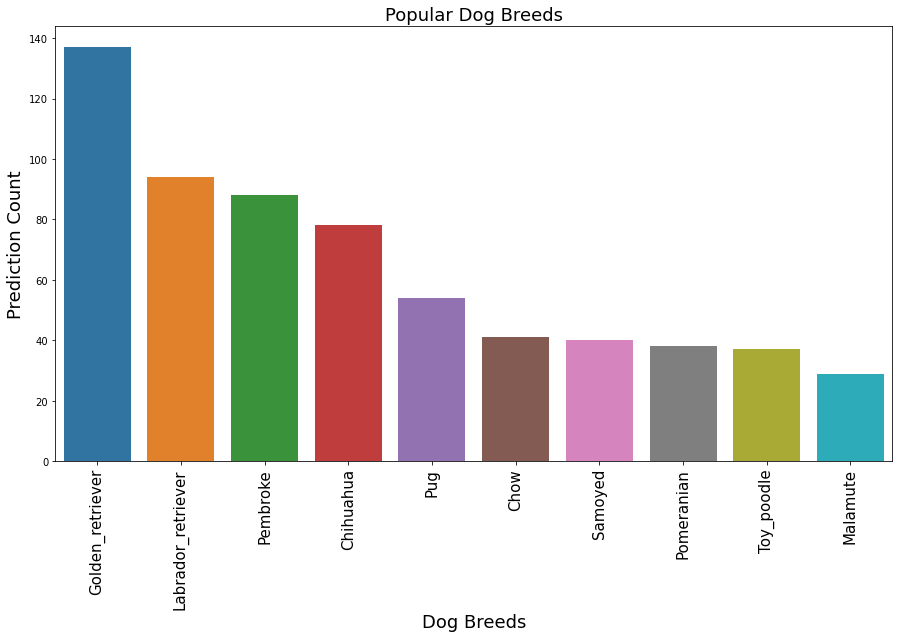

In [96]:
plt.figure(figsize = (15,8))
ax = sb.barplot(x = master_clean['first_prediction'].value_counts()[0:10].index,
            y =master_clean['first_prediction'].value_counts()[0:10],
            data = master_clean);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);

## *Top Counts of Most Popular dog breed - Golden Retriever*

In [97]:
#get data frame for  golden_retriever
golden_ret_df = master_clean.query('first_prediction == "Golden_retriever"')

In [98]:
golden_ret_df.sort_values('first_confidence',ascending=False).head(3)

tweet_id                                              tweet  \
1433  779834332596887552  This is Scout. He really wants to kiss himself...   
176   669216679721873412  This is Clarq. He's a golden Quetzalcoatl. Cla...   
1046  715680795826982913  This is Zeus. He's downright fabulous. 12/10 h...   

      rating_numerator  rating_denominator   name dog_stage  year  month  \
1433              11.0                10.0  Scout       NaN  2016      9   
176                8.0                10.0  Clarq       NaN  2015     11   
1046              12.0                10.0   Zeus       NaN  2016      3   

       weekday  retweet_count  ...  \
1433    Sunday           8237  ...   
176    Tuesday            422  ...   
1046  Thursday           1813  ...   

                                              jpg_url  first_prediction  \
1433  https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg  Golden_retriever   
176   https://pbs.twimg.com/media/CUmJBS5WUAAKtrP.jpg  Golden_retriever   
1046  https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg  Golden_retriever   

     first_confidence first_dog   second_prediction  second_confidence  \
1433         0.993830      True      Cocker_spaniel           0.003143   
176          0.992758      True        Irish_setter           0.003379   
1046         0.990715      True  Labrador_retriever           0.002228   

     second_dog  third_prediction  third_confidence third_dog  
1433       True    Great_pyrenees          0.000917      True  
176        True            Saluki          0.001230      True  
1046       True              Chow          0.001197      True  

[3 rows x 22 columns]

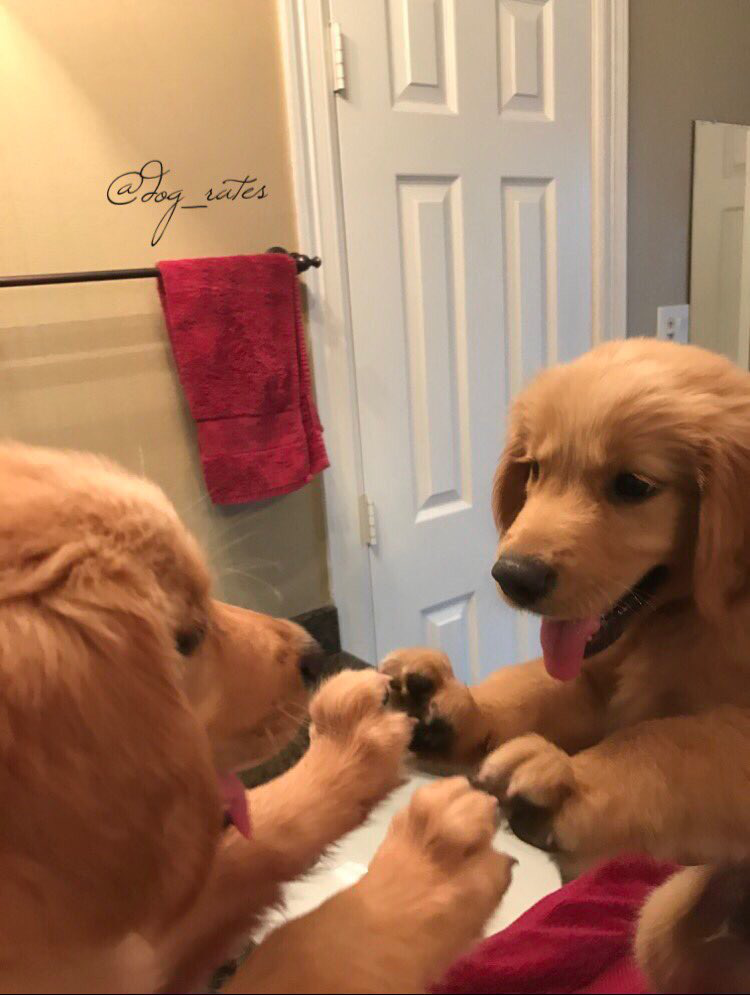

In [99]:
#first the best Breed probability (Golden Retriever)with high confidence 

url = master_clean.jpg_url[1433]
r = requests.get(url)
Image.open(BytesIO(r.content))


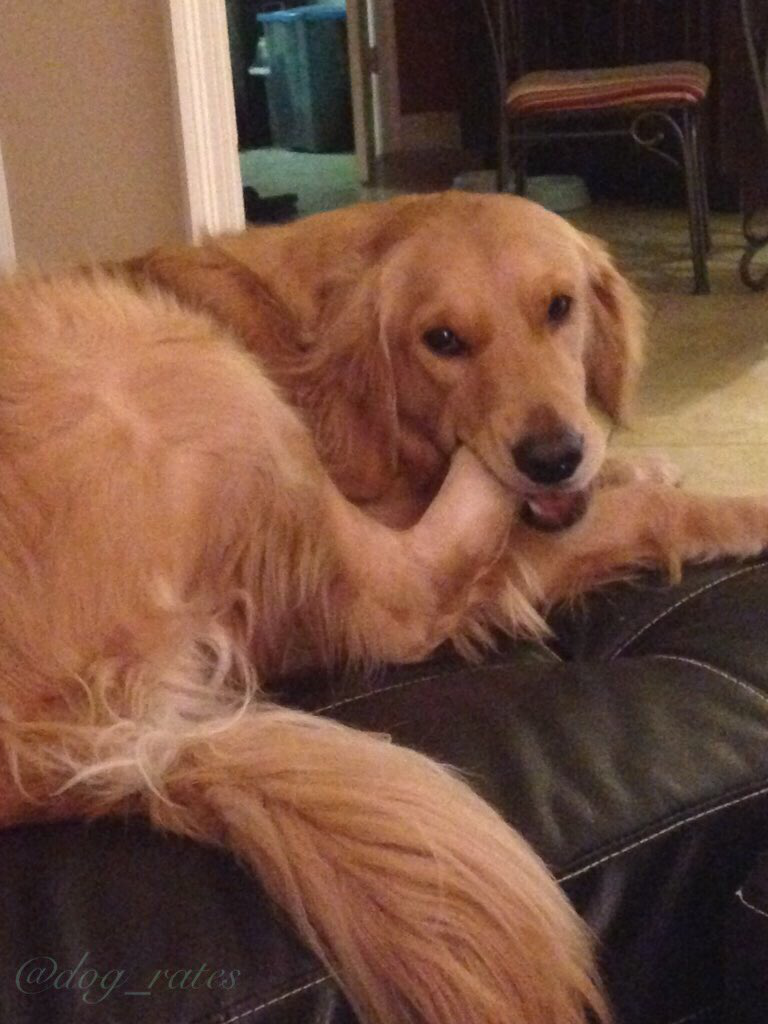

In [100]:
#sceond the best Breed probability (Golden Retriever) with high confidence 
url = master_clean.jpg_url[176]
r = requests.get(url)
Image.open(BytesIO(r.content))

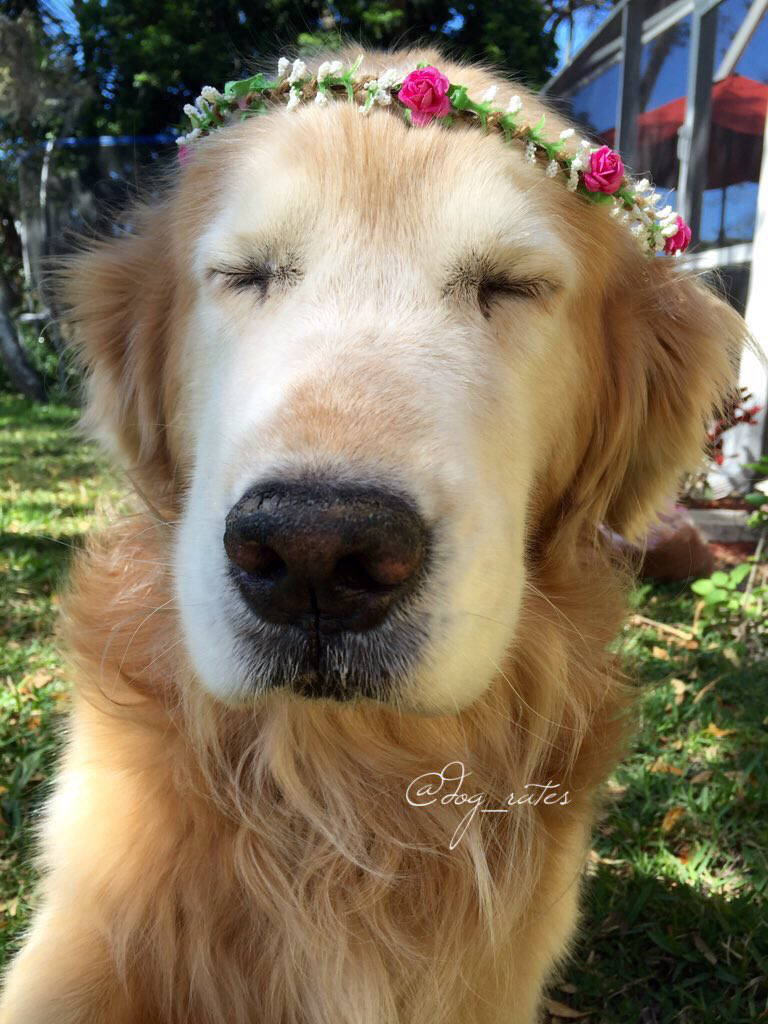

In [101]:
#Third the best Breed probability (Golden Retriever) with high confidence 
url = master_clean.jpg_url[1046]
r = requests.get(url)
Image.open(BytesIO(r.content))

# High popular dog stage count tweets

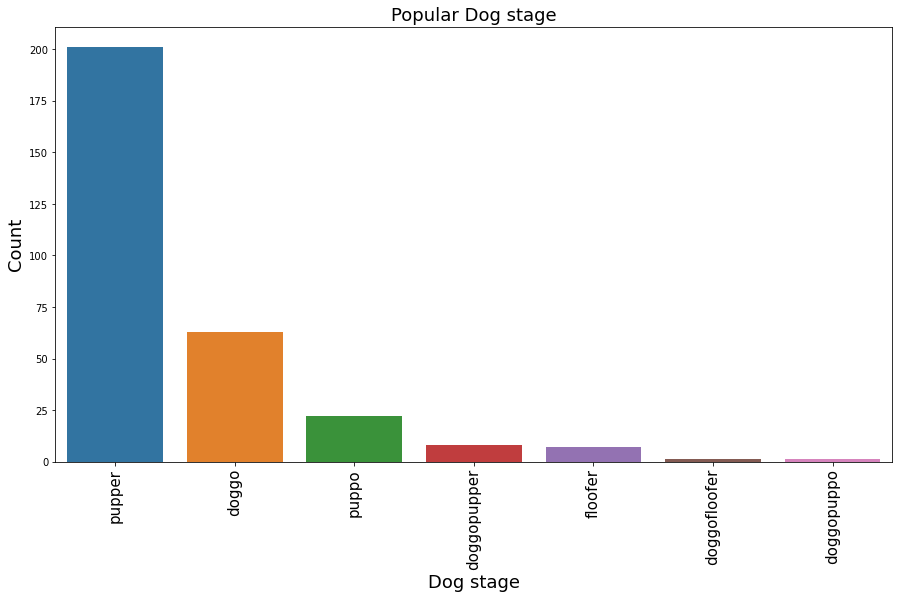

In [102]:
plt.figure(figsize = (15,8))
ax = sb.barplot(x = master_clean['dog_stage'].value_counts()[0:10].index,
            y =master_clean['dog_stage'].value_counts()[0:10],
            data = master_clean);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog stage",fontsize = 18);
plt.ylabel("Count",fontsize = 18);
plt.title("Popular Dog stage",fontsize = 18);

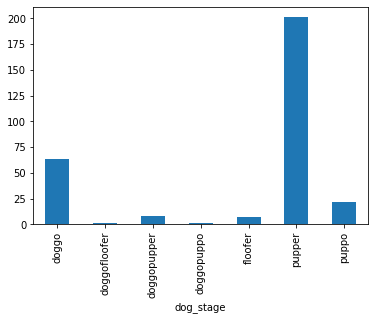

In [103]:
#highest Dogs Stage according to favorite counts
master_clean.groupby("dog_stage")['favorite_count'].count().plot(kind='bar');


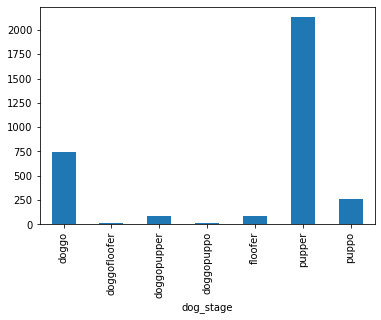

In [104]:
#highest Dogs Stage according to total rate visitors
master_clean.groupby("dog_stage")['rating_numerator'].sum().plot(kind='bar');


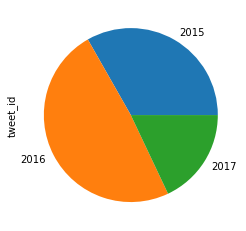

In [105]:
# Twitter user increase in 2016 and cringe in 2017 at WeRatingDos
master_clean.groupby("year")['tweet_id'].count().plot(kind='pie');


In [106]:
master_clean.groupby("year")['tweet_id'].count().sort_values(ascending=False)


year
2016    962
2015    655
2017    354
Name: tweet_id, dtype: int64

In [107]:
master_clean.groupby('weekday').count()

tweet_id  tweet  rating_numerator  rating_denominator  name  \
weekday                                                                  
Friday          279    279               279                 279   195   
Monday          326    326               326                 326   225   
Saturday        248    248               248                 248   179   
Sunday          254    254               254                 254   165   
Thursday        280    280               280                 280   203   
Tuesday         291    291               291                 291   207   
Wednesday       293    293               293                 293   218   

           dog_stage  year  month  retweet_count  favorite_count  ...  \
weekday                                                           ...   
Friday            37   279    279            279             279  ...   
Monday            48   326    326            326             326  ...   
Saturday          43   248    248            248             248  ...   
Sunday            34   254    254            254             254  ...   
Thursday          46   280    280            280             280  ...   
Tuesday           48   291    291            291             291  ...   
Wednesday         47   293    293            293             293  ...   

           jpg_url  first_prediction  first_confidence  first_dog  \
weekday                                                             
Friday         279               279               279        279   
Monday         326               326               326        326   
Saturday       248               248               248        248   
Sunday         254               254               254        254   
Thursday       280               280               280        280   
Tuesday        291               291               291        291   
Wednesday      293               293               293        293   

           second_prediction  second_confidence  second_dog  third_prediction  \
weekday                                                                         
Friday                   279                279         279               279   
Monday                   326                326         326               326   
Saturday                 248                248         248               248   
Sunday                   254                254         254               254   
Thursday                 280                280         280               280   
Tuesday                  291                291         291               291   
Wednesday                293                293         293               293   

           third_confidence  third_dog  
weekday                                 
Friday                  279        279  
Monday                  326        326  
Saturday                248        248  
Sunday                  254        254  
Thursday                280        280  
Tuesday                 291        291  
Wednesday               293        293  

[7 rows x 21 columns]

In [108]:
#which tweet id and photo got 'liks'
highset_favorite=master_clean.sort_values('favorite_count',ascending=False);
highset_favorite=highset_favorite[['tweet_id','favorite_count','jpg_url','dog_stage','first_prediction']]
highset_favorite.head()

tweet_id  favorite_count  \
1664  822872901745569793          132810   
1201  744234799360020481          131075   
1912  879415818425184262          107956   
1573  807106840509214720          107015   
1862  866450705531457537          106827   

                                                jpg_url dog_stage  \
1664    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg     puppo   
1201  https://pbs.twimg.com/ext_tw_video_thumb/74423...     doggo   
1912  https://pbs.twimg.com/ext_tw_video_thumb/87941...       NaN   
1573  https://pbs.twimg.com/ext_tw_video_thumb/80710...       NaN   
1862    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg    pupper   

        first_prediction  
1664    Lakeland_terrier  
1201  Labrador_retriever  
1912    English_springer  
1573           Chihuahua  
1862      French_bulldog

In [109]:
# the first high favorte for dog stage puppo 

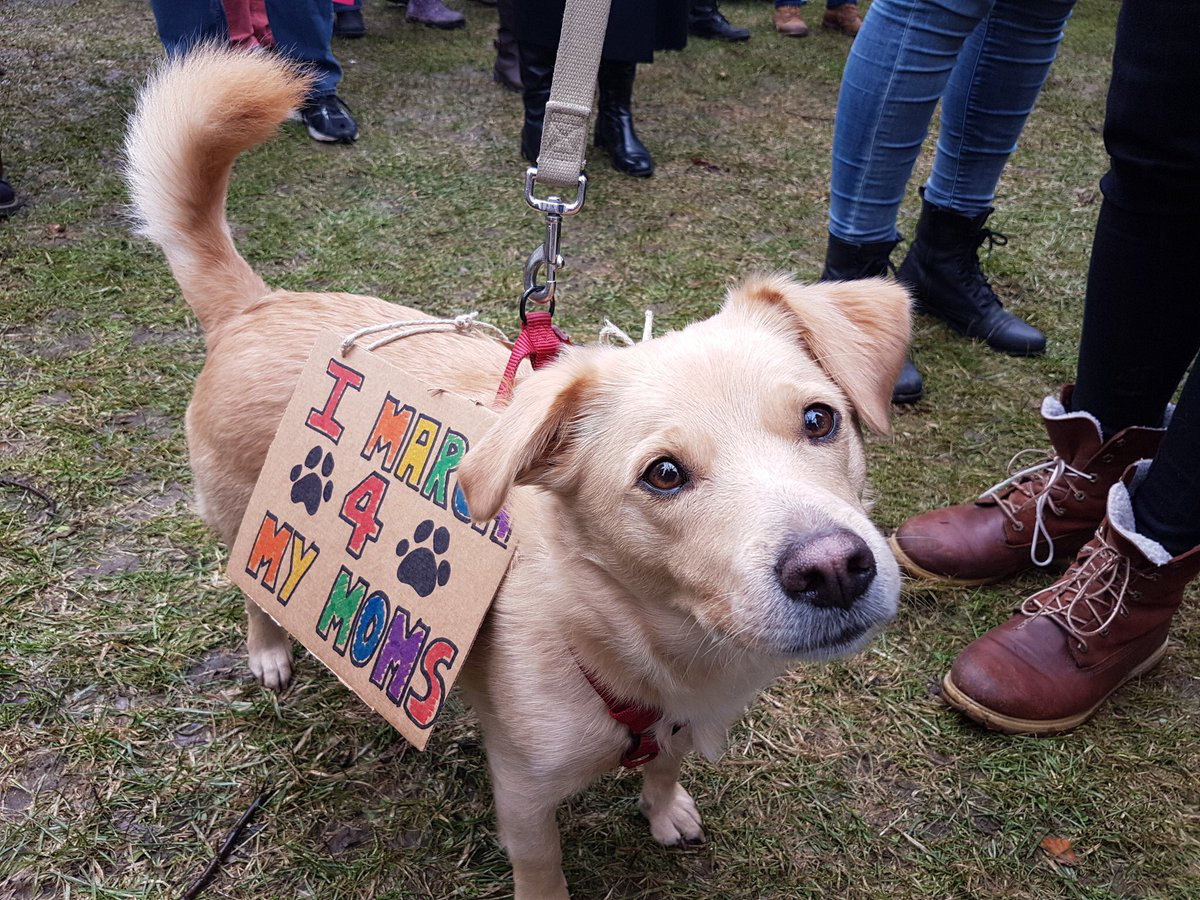

In [110]:
###photo
url = master_clean.jpg_url[1664]
r = requests.get(url)
Image.open(BytesIO(r.content))


In [111]:
# the sceond high favorte for dog stage puppo 

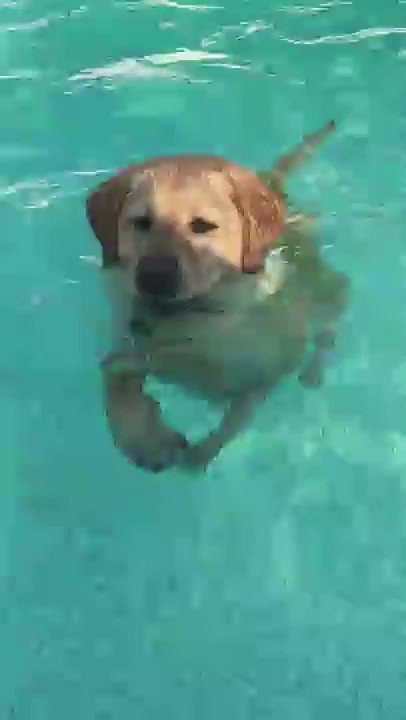

In [112]:
###photo
url = master_clean.jpg_url[1201]
r = requests.get(url)
Image.open(BytesIO(r.content))


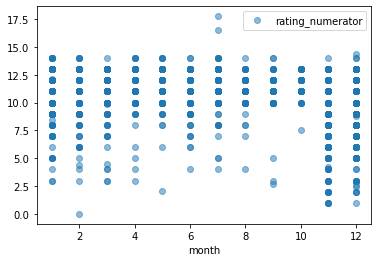

In [113]:
# rating per month count 
##we  can see that rating increase during jan,nov, dec (winter months)
master_clean.plot(y='rating_numerator',x='month',style='o',alpha=.5);

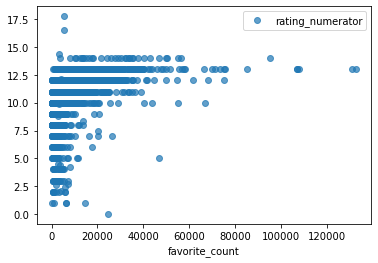

In [114]:
##rating per favorite count
# most of pepole give high rate and give high like that mean most of them like his dog too much

master_clean.plot(y='rating_numerator',x='favorite_count',style='o',alpha=.7);

In [115]:
# Important Data statistic for WeRateDogs
data_statistic_describe=master_clean[['rating_numerator','retweet_count','favorite_count','first_confidence','second_confidence','third_confidence']]
data_statistic_describe.describe()

rating_numerator  retweet_count  favorite_count  first_confidence  \
count       1971.000000    1971.000000     1971.000000       1971.000000   
mean          10.500863    2784.449518     8949.106545          0.594558   
std            2.243487    4697.662893    12267.799790          0.272126   
min            0.000000      16.000000       81.000000          0.044333   
25%           10.000000     628.500000     1997.000000          0.363091   
50%           11.000000    1367.000000     4147.000000          0.587764   
75%           12.000000    3239.000000    11402.500000          0.847827   
max           17.760000   79515.000000   132810.000000          1.000000   

       second_confidence  third_confidence  
count       1.971000e+03      1.971000e+03  
mean        1.345850e-01      6.016556e-02  
std         1.010527e-01      5.094156e-02  
min         1.011300e-08      1.740170e-10  
25%         5.339800e-02      1.608055e-02  
50%         1.173970e-01      4.944380e-02  
75%         1.955655e-01      9.153815e-02  
max         4.880140e-01      2.734190e-01

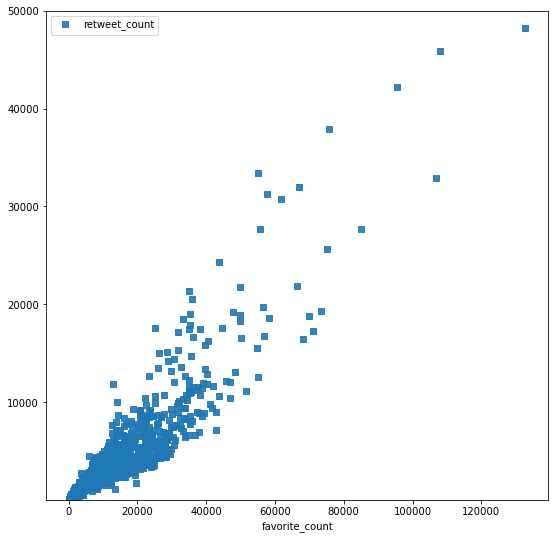

In [116]:
## retweet count over time with favorite counts
master_clean.plot(y='retweet_count',x='favorite_count',style='s',alpha=0.9,figsize=(9,9),ylim=[10,50000]);

In [117]:
# create dataframe for high dogs stage to correlate
df_dog_type_count = master_clean.groupby('dog_stage').count()

In [118]:
# According to dog stage high tweets,rate,likes,retwwwt,.....
df_dog_type_count=df_dog_type_count[['tweet_id',"tweet",'rating_denominator','favorite_count','retweet_count','name','first_prediction','first_confidence','first_dog','second_prediction','second_confidence','second_dog','third_prediction','third_confidence','third_dog']]

In [119]:
# sort according to rate
df_dog_type_count.sort_values('rating_denominator',ascending=False)

tweet_id  tweet  rating_denominator  favorite_count  \
dog_stage                                                           
pupper             201    201                 201             201   
doggo               63     63                  63              63   
puppo               22     22                  22              22   
doggopupper          8      8                   8               8   
floofer              7      7                   7               7   
doggofloofer         1      1                   1               1   
doggopuppo           1      1                   1               1   

              retweet_count  name  first_prediction  first_confidence  \
dog_stage                                                               
pupper                  201   122               201               201   
doggo                    63    38                63                63   
puppo                    22    15                22                22   
doggopupper               8     5                 8                 8   
floofer                   7     5                 7                 7   
doggofloofer              1     0                 1                 1   
doggopuppo                1     0                 1                 1   

              first_dog  second_prediction  second_confidence  second_dog  \
dog_stage                                                                   
pupper              201                201                201         201   
doggo                63                 63                 63          63   
puppo                22                 22                 22          22   
doggopupper           8                  8                  8           8   
floofer               7                  7                  7           7   
doggofloofer          1                  1                  1           1   
doggopuppo            1                  1                  1           1   

              third_prediction  third_confidence  third_dog  
dog_stage                                                    
pupper                     201               201        201  
doggo                       63                63         63  
puppo                       22                22         22  
doggopupper                  8                 8          8  
floofer                      7                 7          7  
doggofloofer                 1                 1          1  
doggopuppo                   1                 1          1

In [120]:
import jovian

In [129]:
jovian.commit(project='course-project')


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "mahmoud-adel2100/course-project"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mahmoud-adel2100/course-project


'https://jovian.ml/mahmoud-adel2100/course-project'

In [130]:
jovian.commit(file='tweet_json.txt')


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mahmoud-adel2100/course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mahmoud-adel2100/course-project


'https://jovian.ml/mahmoud-adel2100/course-project'

In [131]:
jovian.commit(file='twitter-archive-enhanced.csv')


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mahmoud-adel2100/course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mahmoud-adel2100/course-project


'https://jovian.ml/mahmoud-adel2100/course-project'

In [132]:
jovian.commit(file='twitter_archive_master.csv')


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mahmoud-adel2100/course-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mahmoud-adel2100/course-project


'https://jovian.ml/mahmoud-adel2100/course-project'

In [ ]:
jovian.commit(file='image_predictions.tsv')


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
